# Proyecto Integrador

## Integrantes del equipo:
*   Angel Brito Segura
*   Julio Cesar Villafranco Perez
*   Dayana Ailed Jiménez Copeño

In [1]:
# Conectando Google Drive con el Notebook de Colab
from google.colab import drive
"""
Se enlaza el entorno de ejecución (con un código de autorización) al espacio de
almacenamiento, con lo que se puede leer, escribir y mover archivos en Drive
"""
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Instalación de librerías
!pip install pycountry

     |████████████████████████████████| 10.1 MB 4.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=2d06ef7b1847d3395cc0af1d73521ec8d891382681dfe3c044e31d9d5eb8f6be
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


## Leyendo y pre-procesando los datos

In [5]:
# Importando y configurando nuestras dependencias
import numpy as np 
import pandas as pd 
from datetime import datetime


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
#import pycountry
import folium 
from folium import plugins


import numpy as np
from PIL import Image


import matplotlib.ticker as ticker
import matplotlib.animation as animation
from matplotlib import rcParams
from IPython.display import HTML

# Graphics in retina format 
%config InlineBackend.figure_format = 'retina' 

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5


# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')
import os

#Leyendo el archivo
df = pd.read_csv('/content/drive/MyDrive/ProyectoMódulo2/forbes-dataset-2020.csv')
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [ ]:
# df = pd.read_csv('forbes-dataset-2020.csv')

In [6]:
# creando copia del dataframe original
df1 = df.copy()
df1.drop('S.NO',axis=1,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  301 non-null    object 
 1   Nationality           301 non-null    object 
 2   Current Rank          301 non-null    int64  
 3   Previous Year Rank    277 non-null    object 
 4   Sport                 301 non-null    object 
 5   Year                  301 non-null    int64  
 6   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 16.6+ KB


In [7]:
# Year a datatime de Python
df1['Year'] = df1['Year'].apply(pd.to_datetime,format='%Y')

# Poner el año como la columna índice
df1['year'] = pd.DatetimeIndex(df1['Year']).year  
df1.set_index('year', inplace=True)
df1.drop('Year',axis=1,inplace=True)

# Columna sport a mayúsculas
df1['Sport'] = df1['Sport'].str.upper()
df1

,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
year,,,,,,
1990,Mike Tyson,USA,1,NaN,BOXING,28.6
1990,Buster Douglas,USA,2,NaN,BOXING,26.0
1990,Sugar Ray Leonard,USA,3,NaN,BOXING,13.0
1990,Ayrton Senna,Brazil,4,NaN,AUTO RACING,10.0
1990,Alain Prost,France,5,NaN,AUTO RACING,9.0
...,...,...,...,...,...,...
2020,Stephen Curry,USA,6,9,BASKETBALL,74.4
2020,Kevin Durant,USA,7,10,BASKETBALL,63.9
2020,Tiger Woods,USA,8,11,GOLF,62.3


## Actividades

### Deportistas cuyo ranking ha subido al menos dos lugares entre 2010 y 2020.

In [149]:
df2 = pd.DataFrame(df1,columns=['Current Rank','Previous Year Rank', 'Name'])
#Obteniendo deportistas entre 2010 y 2020
df2 = df2[(df2.index > 2009)]
df2 = df2.sort_values(by=['Name','Current Rank'],ascending=False)
df2

,Current Rank,Previous Year Rank,Name
year,,,
2015,9,6,Tiger Woods
2020,8,11,Tiger Woods
2014,6,1,Tiger Woods
2012,3,1,Tiger Woods
2010,1,1,Tiger Woods
...,...,...,...
2016,7,>20,Cam Newton
2017,6,NaN,Andrew Luck
2011,8,12,Alex Rodriguez


In [156]:
df3 = df2.dropna(subset=["Previous Year Rank"])
df3

,Current Rank,Previous Year Rank,Name
year,,,
2015,9,6,Tiger Woods
2020,8,11,Tiger Woods
2014,6,1,Tiger Woods
2012,3,1,Tiger Woods
2010,1,1,Tiger Woods
...,...,...,...
2019,4,15,Canelo Alvarez
2016,7,>20,Cam Newton
2011,8,12,Alex Rodriguez


### Atleta con el menor número de apariciones y mayores ganancias.

In [9]:
atleta_menos_apariciones = pd.DataFrame(df1,columns = ['Name','earnings ($ million)'])
atleta_menos_apariciones = atleta_menos_apariciones.sort_values(by='Name',ascending=False)
atleta_menos_apariciones

,Name,earnings ($ million)
year,,
1994,Wayne Gretzky,13.5
1995,Wayne Gretzky,14.5
2005,Valentino Rossi,28.0
2006,Valentino Rossi,30.0
2009,Valentino Rossi,35.0
...,...,...
1993,Alain Prost,16.0
1990,Alain Prost,9.0
1991,Alain Prost,11.0


In [72]:
total_atletas = atleta_menos_apariciones['Name'].value_counts().to_frame()
total_atletas = total_atletas[total_atletas['Name'] < 2].reset_index()
total_atletas

,index,Name
0,Kirk Cousins,1
1,Canelo Alvarez,1
2,Rafael Nadal,1
3,Dale Earnhardt Jr.,1
4,Conor McGregor,1
5,Cecil Fielder,1
6,Carson Wentz,1
7,Cam Newton,1
8,Dennis Rodman,1
9,Buster Douglas,1


In [74]:
atleta_menos_apariciones2 = atleta_menos_apariciones.groupby(by = ['Name']).sum()
atleta_menos_apariciones2

,earnings ($ million)
Name,
Aaron Rodgers,49.0
Aaron Rogers,89.3
Alain Prost,36.0
Alex Rodriguez,116.2
Andre Agassi,105.8
...,...
Terrell Suggs,38.3
Tiger Woods,1373.8
Tom Brady,29.0


In [78]:
atleta_menos_apariciones3 = pd.merge(left=total_atletas, right = atleta_menos_apariciones2, left_on='index', right_on='Name')
atleta_menos_apariciones3 = atleta_menos_apariciones3[atleta_menos_apariciones3['earnings ($ million)'] >= max(atleta_menos_apariciones3['earnings ($ million)'])]
atleta_menos_apariciones3

,index,Name,earnings ($ million)
4,Conor McGregor,1,99.0


### Deporte y país con mayor número de atletas no rankeados que entraron en la lista de atletas mejor pagados.

In [129]:
df_deporte_pais = pd.DataFrame(df1, columns=['Sport','Nationality','Name','Current Rank','Previous Year Rank' ])
df_deporte_pais = df_deporte_pais.sort_values('Current Rank', ascending=True)
df_deporte_pais

,Sport,Nationality,Name,Current Rank,Previous Year Rank
year,,,,,
1990,BOXING,USA,Mike Tyson,1,NaN
1993,BASKETBALL,USA,Michael Jordan,1,1
2009,GOLF,USA,Tiger Woods,1,1
2017,SOCCER,Portugal,Cristiano Ronaldo,1,1
2008,GOLF,USA,Tiger Woods,1,1
...,...,...,...,...,...
2002,AUTO RACING,Canada,Jacques Villeneuve,10,>10
2000,BASKETBALL,USA,Kevin Garnett,10,>10
1999,BASKETBALL,USA,Grant Hill,10,6


In [138]:
atletas_NR = df_deporte_pais.fillna(0)
atletas_NR = atletas_NR[atletas_NR['Previous Year Rank'] == 0]
atletas_NR

,Sport,Nationality,Name,Current Rank,Previous Year Rank
year,,,,,
1990,BOXING,USA,Mike Tyson,1,0
1998,BASKETBALL,USA,Michael Jordan,1,0
1990,BOXING,USA,Buster Douglas,2,0
1998,F1 MOTORSPORTS,Germany,Michael Schumacher,2,0
1998,ICE HOCKEY,Russia,Sergei Federov,3,0
1990,BOXING,USA,Sugar Ray Leonard,3,0
1998,GOLF,USA,Tiger Woods,4,0
1990,AUTO RACING,Brazil,Ayrton Senna,4,0
1990,AUTO RACING,France,Alain Prost,5,0


In [139]:
atletas_mejor_pagados = atletas_NR[atletas_NR['Current Rank'] == 1]
atletas_mejor_pagados

,Sport,Nationality,Name,Current Rank,Previous Year Rank
year,,,,,
1990,BOXING,USA,Mike Tyson,1,0
1998,BASKETBALL,USA,Michael Jordan,1,0


### País con mayor número de deportes con atletas en el dataset.

In [27]:
df_pais_atleta = pd.DataFrame(df1,columns=['Nationality','Sport','Name'])
df_pais_atleta = df_pais_atleta.sort_values(by=['Nationality','Sport'],ascending=False)
df_pais_atleta

,Nationality,Sport,Name
year,,,
1992,USA,TENNIS,Andre Agassi
1992,USA,TENNIS,Jim Courier
1992,USA,TENNIS,Monica Seles
1993,USA,TENNIS,Jim Courier
1994,USA,TENNIS,Andre Agassi
...,...,...,...
2016,Argentina,SOCCER,Lionel Messi
2017,Argentina,SOCCER,Lionel Messi
2018,Argentina,SOCCER,Lionel Messi


In [37]:
pais_atleta = df_pais_atleta.groupby(by = ['Nationality','Sport']).count()
pais_atleta = pais_atleta.groupby(by = ['Nationality']).sum()
pais_atleta = pais_atleta[pais_atleta['Name'] >= max(pais_atleta['Name'])]
pais_atleta

,Name
Nationality,
USA,206


### ¿Cuántos atletas por deporte tiene cada país?

In [43]:
df_atleta_dep = pd.DataFrame(df1,columns=['Name','Sport','Nationality'])
df_atleta_dep

,Name,Sport,Nationality
year,,,
1990,Mike Tyson,BOXING,USA
1990,Buster Douglas,BOXING,USA
1990,Sugar Ray Leonard,BOXING,USA
1990,Ayrton Senna,AUTO RACING,Brazil
1990,Alain Prost,AUTO RACING,France
...,...,...,...
2020,Stephen Curry,BASKETBALL,USA
2020,Kevin Durant,BASKETBALL,USA
2020,Tiger Woods,GOLF,USA


In [44]:
df_atleta_dep = df_atleta_dep.groupby(by = ['Sport','Nationality']).count()
df_atleta_dep

Name
Sport                        Nationality           
AMERICAN FOOTBALL            USA                 17
AMERICAN FOOTBALL / BASEBALL USA                  1
AUTO RACING                  Austria              1
                             Brazil               4
                             Canada               2
                             France               3
                             Germany              3
                             UK                   4
                             USA                  1
AUTO RACING (NASCAR)         USA                  2
BASEBALL                     Dominican            1
                             USA                  5
BASKETBALL                   USA                 81
BOXING                       Canada               1
                             Filipino             1
                             Mexico               1
                             Philippines          3
                             USA                 40
CYCLING                      USA                  1
F1 MOTORSPORTS               Germany              5
F1 RACING                    Finland              3
                             Germany              5
GOLF                         Australia            1
                             Northern Ireland     1
                             USA                 42
HOCKEY                       Canada               1
ICE HOCKEY                   Canada               2
                             Russia               1
MMA                          Ireland              1
MOTORCYCLE GP                Italy                4
NASCAR                       USA                  3
NBA                          USA                  1
NFL                          USA                  3
SOCCER                       Argentina            9
                             Brazil               5
                             Portugal            10
                             UK                   9
TENNIS                       Serbia               1
                             Spain                1
                             Switzerland         12
                             USA                  9

### Ganancia mínima y máxima (dentro del dataset) por deporte y por país.

In [110]:
ganancia_min_max = pd.DataFrame(df1,columns=['Sport','Nationality','earnings ($ million)'])
ganancia_min_max

,Sport,Nationality,earnings ($ million)
year,,,
1990,BOXING,USA,28.6
1990,BOXING,USA,26.0
1990,BOXING,USA,13.0
1990,AUTO RACING,Brazil,10.0
1990,AUTO RACING,France,9.0
...,...,...,...
2020,BASKETBALL,USA,74.4
2020,BASKETBALL,USA,63.9
2020,GOLF,USA,62.3


In [128]:
#Ganancia máxima
df_max = ganancia_min_max.groupby(by = ['Sport', 'Nationality']).max()
df_max

earnings ($ million)
Sport                        Nationality                           
AMERICAN FOOTBALL            USA                               89.5
AMERICAN FOOTBALL / BASEBALL USA                               22.5
AUTO RACING                  Austria                           13.5
                             Brazil                            22.0
                             Canada                            23.0
                             France                            16.0
                             Germany                           59.0
                             UK                                46.0
                             USA                               26.5
AUTO RACING (NASCAR)         USA                               24.5
BASEBALL                     Dominican                         35.0
                             USA                               29.0
BASKETBALL                   USA                               89.0
BOXING                       Canada                            10.2
                             Filipino                          62.0
                             Mexico                            94.0
                             Philippines                      160.0
                             USA                              300.0
CYCLING                      USA                               28.0
F1 MOTORSPORTS               Germany                           75.0
F1 RACING                    Finland                           45.0
                             Germany                           80.0
GOLF                         Australia                          8.5
                             Northern Ireland                  50.0
                             USA                              115.0
HOCKEY                       Canada                            17.9
ICE HOCKEY                   Canada                            14.5
                             Russia                            29.8
MMA                          Ireland                           99.0
MOTORCYCLE GP                Italy                             35.0
NASCAR                       USA                               34.0
NBA                          USA                               15.2
NFL                          USA                               16.5
SOCCER                       Argentina                        127.0
                             Brazil                           105.0
                             Portugal                         109.0
                             UK                                50.0
TENNIS                       Serbia                            55.8
                             Spain                             44.5
                             Switzerland                      106.3
                             USA                               28.2

In [127]:
# Ganancia mínima
df_min = ganancia_min_max.groupby(by = ['Sport', 'Nationality']).min()
df_min

earnings ($ million)
Sport                        Nationality                           
AMERICAN FOOTBALL            USA                               29.0
AMERICAN FOOTBALL / BASEBALL USA                               22.5
AUTO RACING                  Austria                           13.5
                             Brazil                            10.0
                             Canada                            20.0
                             France                             9.0
                             Germany                           15.0
                             UK                                 9.0
                             USA                               26.5
AUTO RACING (NASCAR)         USA                               20.0
BASEBALL                     Dominican                         35.0
                             USA                               12.7
BASKETBALL                   USA                                8.1
BOXING                       Canada                            10.2
                             Filipino                          62.0
                             Mexico                            94.0
                             Philippines                       40.0
                             USA                                8.1
CYCLING                      USA                               28.0
F1 MOTORSPORTS               Germany                           33.0
F1 RACING                    Finland                           40.0
                             Germany                           34.0
GOLF                         Australia                          8.5
                             Northern Ireland                  50.0
                             USA                                8.1
HOCKEY                       Canada                            17.9
ICE HOCKEY                   Canada                            13.5
                             Russia                            29.8
MMA                          Ireland                           99.0
MOTORCYCLE GP                Italy                             28.0
NASCAR                       USA                               19.1
NBA                          USA                               15.2
NFL                          USA                                9.5
SOCCER                       Argentina                         32.3
                             Brazil                            31.0
                             Portugal                          38.0
                             UK                                28.0
TENNIS                       Serbia                            55.8
                             Spain                             44.5
                             Switzerland                       35.0
                             USA                                8.5

### Atleta con mayores ganancias por deporte por década

In [53]:
df_atletas_ganancia = pd.DataFrame(df1, columns=['Sport','Name','earnings ($ million)'])
df_atletas_ganancia

,Sport,Name,earnings ($ million)
year,,,
1990,BOXING,Mike Tyson,28.6
1990,BOXING,Buster Douglas,26.0
1990,BOXING,Sugar Ray Leonard,13.0
1990,AUTO RACING,Ayrton Senna,10.0
1990,AUTO RACING,Alain Prost,9.0
...,...,...,...
2020,BASKETBALL,Stephen Curry,74.4
2020,BASKETBALL,Kevin Durant,63.9
2020,GOLF,Tiger Woods,62.3


In [54]:
Top_paid_each_year =df_atletas_ganancia[(df_atletas_ganancia.index == 1990)| (df_atletas_ganancia.index == 2000)| (df_atletas_ganancia.index == 2010) | (df_atletas_ganancia.index == 2020)  ]
Top_paid_each_year

,Sport,Name,earnings ($ million)
year,,,
1990,BOXING,Mike Tyson,28.6
1990,BOXING,Buster Douglas,26.0
1990,BOXING,Sugar Ray Leonard,13.0
1990,AUTO RACING,Ayrton Senna,10.0
1990,AUTO RACING,Alain Prost,9.0
1990,GOLF,Jack Nicklaus,8.6
1990,GOLF,Greg Norman,8.5
1990,BASKETBALL,Michael Jordan,8.1
1990,GOLF,Arnold Palmer,8.1


In [63]:
Top_paid_each_year2 = Top_paid_each_year.sort_values(by=['Sport','earnings ($ million)'],ascending=False)
Top_paid_each_year2 = Top_paid_each_year2.groupby(by = ['year', 'Sport']).max()
Top_paid_each_year2

Name  earnings ($ million)
year Sport                                                         
1990 AUTO RACING                 Ayrton Senna                  10.0
     BASKETBALL                Michael Jordan                   8.1
     BOXING                 Sugar Ray Leonard                  28.6
     GOLF                       Jack Nicklaus                   8.6
2000 AUTO RACING           Michael Schumacher                  59.0
     AUTO RACING (NASCAR)      Dale Earnhardt                  24.5
     BASKETBALL                   Shaq O'Neal                  37.0
     BOXING                  Oscar De La Hoya                  48.0
     GOLF                         Tiger Woods                  53.0
2010 AMERICAN FOOTBALL          Terrell Suggs                  39.9
     BASKETBALL                  LeBron James                  48.0
     BOXING                    Manny Pacquiao                  65.0
     GOLF                         Tiger Woods                 105.0
     SOCCER                     David Beckham                  43.7
     TENNIS                     Roger Federer                  43.0
2020 AMERICAN FOOTBALL           Kirk Cousins                  60.5
     BASKETBALL                 Stephen Curry                  88.2
     GOLF                         Tiger Woods                  62.3
     SOCCER                            Neymar                 105.0
     TENNIS                     Roger Federer                 106.3

### Ganancia total por cada deporte por cada año.

In [68]:
df1_ = pd.DataFrame(df1,columns=['Sport','earnings ($ million)'])
df1_

,Sport,earnings ($ million)
year,,
1990,BOXING,28.6
1990,BOXING,26.0
1990,BOXING,13.0
1990,AUTO RACING,10.0
1990,AUTO RACING,9.0
...,...,...
2020,BASKETBALL,74.4
2020,BASKETBALL,63.9
2020,GOLF,62.3


In [69]:
new = df1_.groupby(by=['Sport',df1_.index]).sum()
new

earnings ($ million)
Sport             year                      
AMERICAN FOOTBALL 2004                  42.0
                  2005                  37.5
                  2006                  29.0
                  2010                  78.2
                  2012                  42.4
...                                      ...
TENNIS            2016                 123.6
                  2017                  64.0
                  2018                  77.2
                  2019                  93.4
                  2020                 106.3

[176 rows x 1 columns]

In [70]:
new2 = df1_.groupby(by=['Sport',df1_.index],as_index=True).sum().reset_index() 
new2

,Sport,year,earnings ($ million)
0,AMERICAN FOOTBALL,2004,42.0
1,AMERICAN FOOTBALL,2005,37.5
2,AMERICAN FOOTBALL,2006,29.0
3,AMERICAN FOOTBALL,2010,78.2
4,AMERICAN FOOTBALL,2012,42.4
...,...,...,...
171,TENNIS,2016,123.6
172,TENNIS,2017,64.0
173,TENNIS,2018,77.2
174,TENNIS,2019,93.4


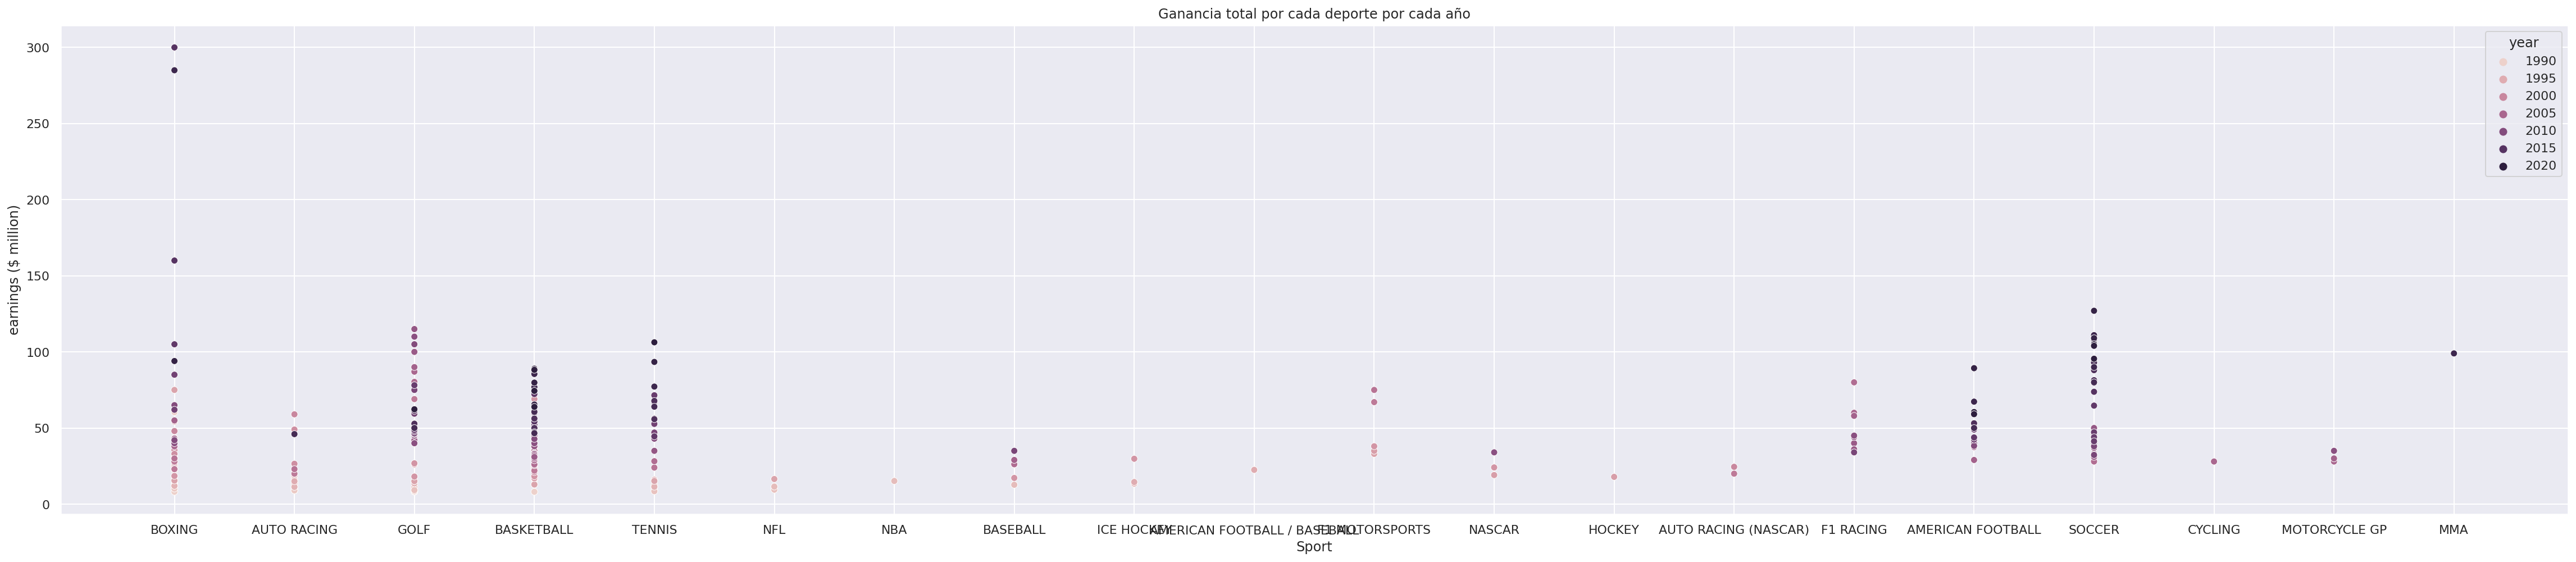

In [ ]:
rcParams['figure.figsize'] = 40,8
plt.title('Ganancia total por cada deporte por cada año')
sns.scatterplot(data=df1, x=df1["Sport"], y=df1["earnings ($ million)"], hue="year") 

### Crea un tablero en Power BI que represente los aspectos más importantes del dataset, a tu gusto.

In [159]:
#Exportar el dataframe para PowerBi
df.to_csv('proyecto.csv', index = False)